In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/models_w_props.csv')
results = pd.read_csv('../strength_covariance/model_ays/bootstrap_data.csv')

create df of average properties, plus df of diff b/w property and average broken down by species

In [3]:
df_mean = df.groupby('species').agg('mean', numeric_only = True)
df_diff = (df.copy().set_index('species')-df_mean)/df_mean
df_diff = df_diff.reset_index()

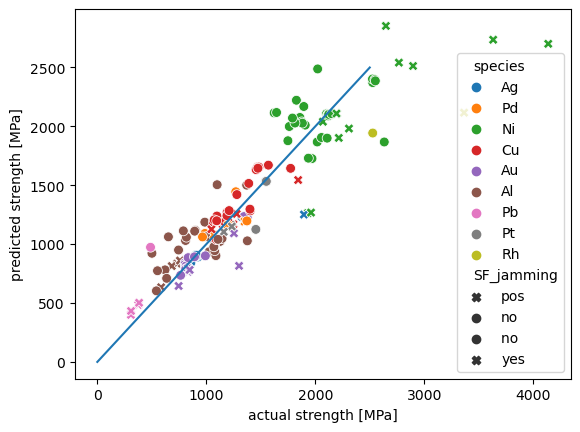

In [4]:
markers = {"yes": "X", "pos": "X", "no": "o", "no ": "o"}
ax = sns.scatterplot(data = results,
            x = "strength_MPa", 
            y = "strength_pred",
            hue = "species",
            style = "SF_jamming",
            markers = markers,
            s=50)
ax.set(xlabel="actual strength [MPa]",
       ylabel="predicted strength [MPa]")
plt.plot(np.arange(0,2500,1),
         np.arange(0,2500,1))

Note that we have "jammed" points which are very accurate. However, the worst offenders do indeed have jamming present

[Text(0.5, 0, 'Unstable SFE'),
 Text(0, 0.5, 'strength error, (pred. - actual)/actual [-]')]

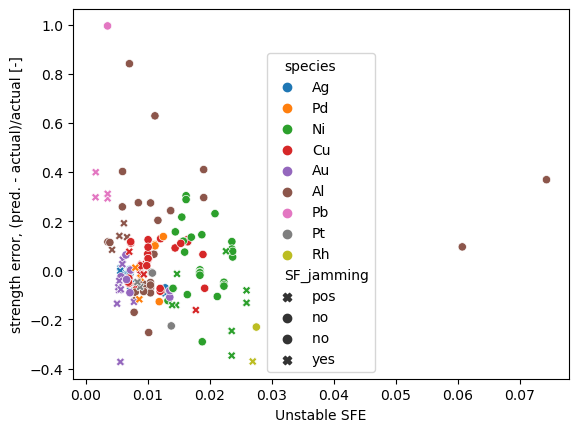

In [5]:
ax = sns.scatterplot(data = df,
            x = "unstable_stack_energy_fcc", 
            y = (results["strength_pred"] - results["strength_MPa"])/results["strength_MPa"],
            hue = "species",
            style = "SF_jamming",
            markers = markers)
ax.set(xlabel="Unstable SFE",
       ylabel="strength error, (pred. - actual)/actual [-]")

[Text(0.5, 0, 'Intr SFE'), Text(0, 0.5, 'hcp fraction')]

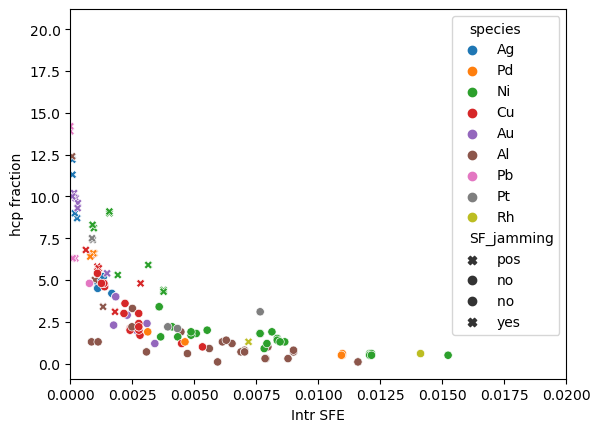

In [6]:
ax = sns.scatterplot(data = df,
            x = "intr_stack_fault_energy_fcc", 
            #y = (results["strength_pred"] - results["strength_MPa"])/results["strength_MPa"],
            y = "hcp_fraction",
            hue = "species",
            style = "SF_jamming",
            markers = markers)
ax.set_xlim([0,0.02])
ax.set(xlabel="Intr SFE",
       ylabel="hcp fraction") #strength error, (pred. - actual)/actual [-]")

[Text(0.5, 0, 'hcp fraction'),
 Text(0, 0.5, 'strength error, (pred. - actual)/actual [-]')]

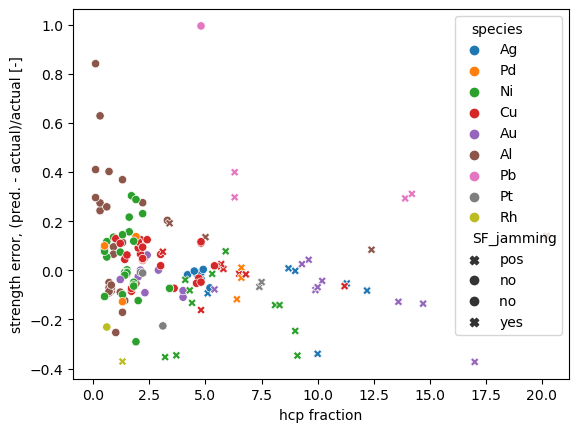

In [7]:
ax = sns.scatterplot(data = df,
            x = "hcp_fraction", 
            y = (results["strength_pred"] - results["strength_MPa"])/results["strength_MPa"],
            hue = "species",
            style = "SF_jamming",
            markers = markers)
ax.set(xlabel="hcp fraction",
       ylabel="strength error, (pred. - actual)/actual [-]")

HCP fraction correlates with whether jamming occurs, but not a good indicator of strength prediction error.